In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_train = pd.read_csv('data/01dataBaseTrainTrxRec.csv', **set_parameter_csv)
data_train.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386


In [3]:
null_verificator(data_train)

,Nulos,Cantidad,Tipo Col
fechaOper,False,0,object
codCliente,False,0,int64
codGiro,True,92686,float64
codEstab,False,0,int64
flagLimaProvEstab,False,0,int64
ubigeoEstab,True,92686,float64
ctdTrx,False,0,int64
ratingMonto,False,0,float64


In [2]:
data_train.fillna(0, inplace=True)

In [3]:
null_verificator(data_train)

'DATA LIMPIA DE NULOS'

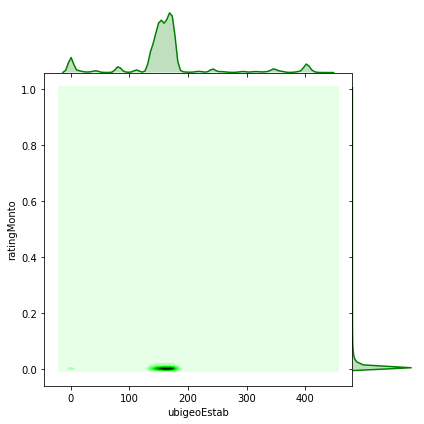

In [8]:
import seaborn as sns
sns.jointplot("ubigeoEstab", "ratingMonto", data=data_train, kind="kde", space=0, color="g")

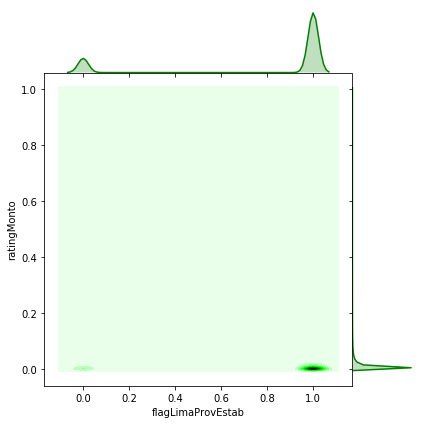

In [9]:
graph_flag = sns.jointplot("flagLimaProvEstab", "ratingMonto", data=data_train, kind="kde", space=0, color="g")
axes = graph_flag.axes


In [14]:
data_train['flagLimaProvEstab'].value_counts()

1    1286691
0     304926
Name: flagLimaProvEstab, dtype: int64

2.984905333727341e-06

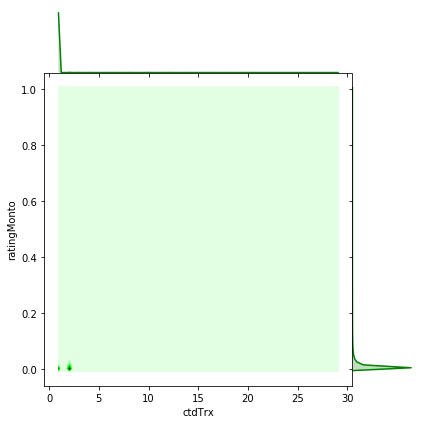

In [10]:
sns.jointplot("ctdTrx", "ratingMonto", data=data_train, kind="kde", space=0, color="g")

In [25]:
data_train.corr(method='spearman')

,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
codCliente,1.000000,-0.009136,0.070043,-0.034130,-0.028267,-0.010348,0.138986
codGiro,-0.009136,1.000000,0.168147,0.244103,0.178750,-0.001824,-0.033643
codEstab,0.070043,0.168147,1.000000,-0.104089,-0.046642,-0.020798,-0.011095
flagLimaProvEstab,-0.034130,0.244103,-0.104089,1.000000,0.162075,0.010951,-0.106590
ubigeoEstab,-0.028267,0.178750,-0.046642,0.162075,1.000000,-0.001994,-0.041516
ctdTrx,-0.010348,-0.001824,-0.020798,0.010951,-0.001994,1.000000,0.090476
ratingMonto,0.138986,-0.033643,-0.011095,-0.106590,-0.041516,0.090476,1.000000


In [7]:
data_train.dtypes

fechaOper             object
codCliente             int64
codGiro              float64
codEstab               int64
flagLimaProvEstab      int64
ubigeoEstab          float64
ctdTrx                 int64
ratingMonto          float64
dtype: object

--------->  ['codCliente', 'codGiro', 'codEstab', 'flagLimaProvEstab', 'ubigeoEstab', 'ratingMonto']


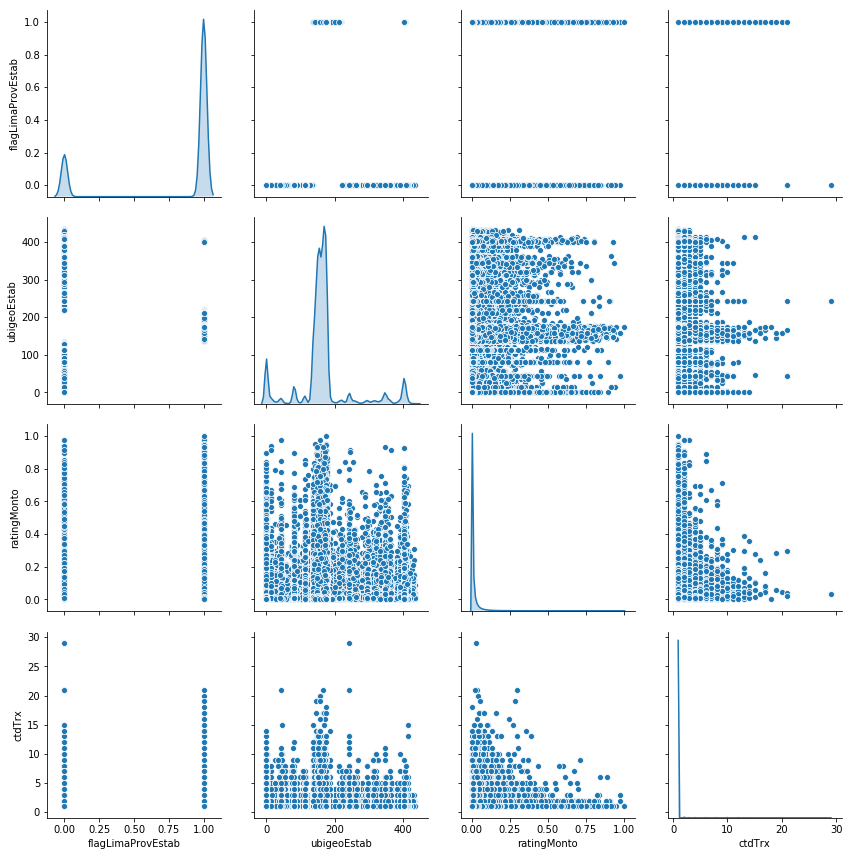

In [10]:
import seaborn as sns
columns_plot = list(data_train.columns)
columns_plot.remove('ctdTrx')
columns_plot.remove('fechaOper')
print('---------> ', columns_plot)
sns.pairplot(data_train, height=3, diag_kind='kde', vars= ['flagLimaProvEstab', 'ubigeoEstab', 'ratingMonto', 'ctdTrx'])

In [11]:
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.9), size = 20, xycoords = ax.transAxes)

In [12]:
def multi_labels(g):
    xlabels,ylabels = [],[]

    for ax in g.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()
        xlabels.append(xlabel)
    for ax in g.axes[:,0]:
        ylabel = ax.yaxis.get_label_text()
        ylabels.append(ylabel)

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            g.axes[j,i].xaxis.set_label_text(xlabels[i])
            g.axes[j,i].yaxis.set_label_text(ylabels[j])

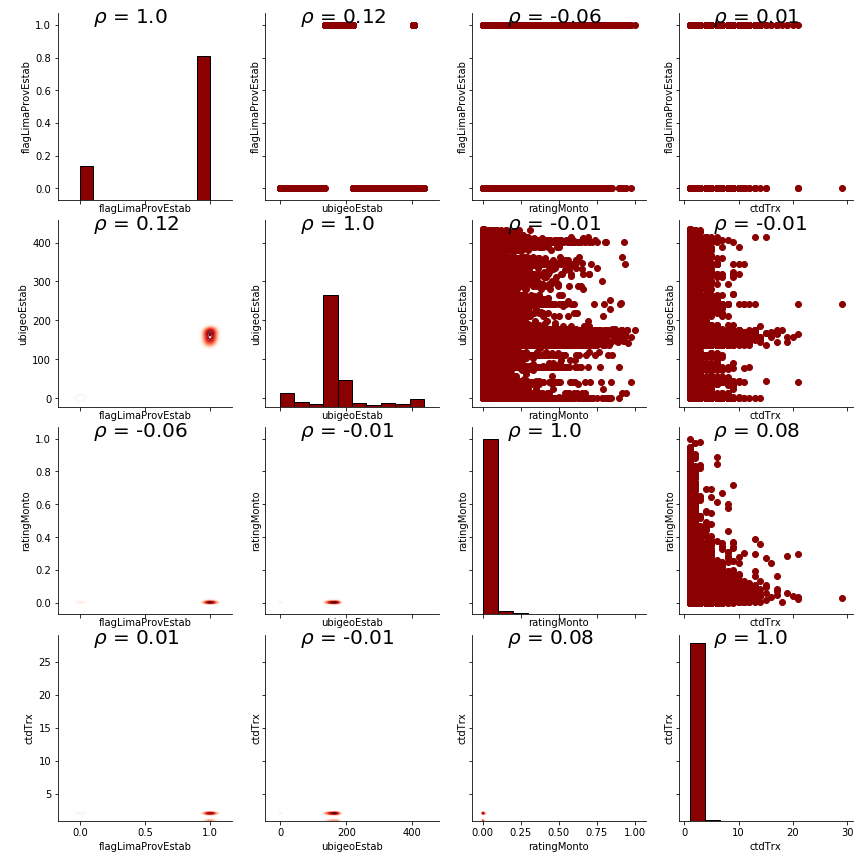

In [15]:
# Create a pair grid instance
grid = sns.PairGrid(data_train, vars= ['flagLimaProvEstab', 'ubigeoEstab', 'ratingMonto', 'ctdTrx'], height = 3)
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor = 'k', color = 'darkred');
grid = grid.map(corr)
multi_labels(grid)